In [ ]:
!pip install opencv-python-headless
import cv2
import numpy as np


In [ ]:
image1 = cv2.imread('/content/image1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/image2.jpg', cv2.IMREAD_GRAYSCALE)

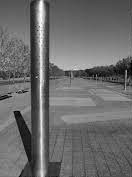

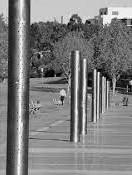

In [ ]:
from google.colab.patches import cv2_imshow

# Display image1
cv2_imshow(image1)

# Display image2
cv2_imshow(image2)


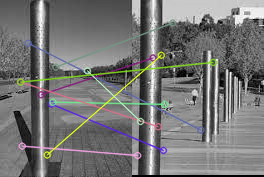

In [ ]:
# Initialize the feature detector (SIFT or ORB)
detector = cv2.SIFT_create()
#detector = cv2.ORB_create()

# Detect key points and compute descriptors
keypoints1, descriptors1 = detector.detectAndCompute(image1, None)
keypoints2, descriptors2 = detector.detectAndCompute(image2, None)

# Create a Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort them in ascending order of distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the matches
match_img = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(match_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Extract key points that are inliers using RANSAC
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)


In [ ]:
warp_image = cv2.warpPerspective(image1, M, (image2.shape[1], image2.shape[0]))


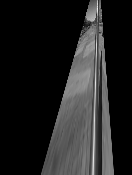

In [ ]:
from google.colab.patches import cv2_imshow

# Display the warped image
cv2_imshow(warp_image)
